In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.coordinates import SkyCoord
from astropy import units as u

import importlib as imp

import regions
from regions import Regions

from astropy.visualization import simple_norm

In [2]:
cd ..

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament


In [3]:
import outflow_plots as op
import cutout_manager as cm
imp.reload(op)

<module 'outflow_plots' from '/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament/outflow_plots.py'>

In [4]:
cd notebooks

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament/notebooks


# Outflow Visualization

In [5]:
clump1 = SkyCoord('17:46:19.2287619119', '-28:38:29.2978617171', unit=(u.hourangle, u.deg))
clump2 = SkyCoord('17:46:19.5945777603', '-28:38:09.9402161687', unit=(u.hourangle, u.deg))

In [46]:
c1_cutout = cm.Cutout(clump1, 25*u.arcsec, 25*u.arcsec)
c2_cutout = cm.Cutout(clump2, 18*u.arcsec, 18*u.arcsec)

In [137]:
c1_I4 = cm.get_cutout_I4(clump1, l=c1_cutout.l*1.5, w=c1_cutout.w*1.5)
c2_I4 = cm.get_cutout_I4(clump2, l=c2_cutout.l*1.5, w=c2_cutout.w*1.5)

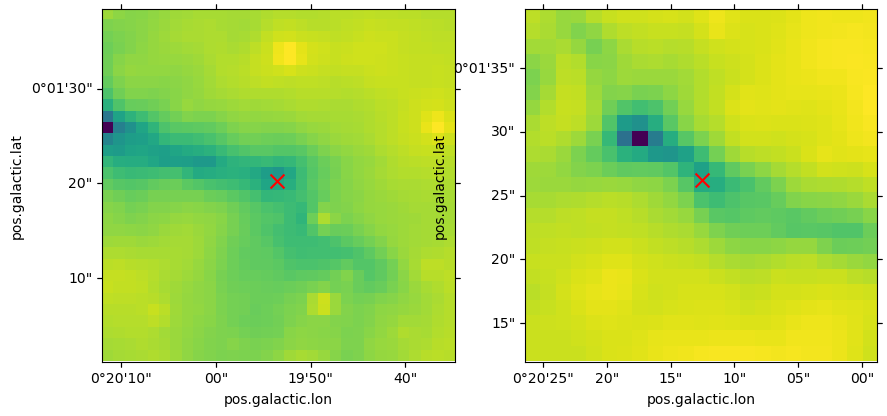

In [138]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection=c1_I4.wcs)
ax1.imshow(c1_I4.data, origin='lower', cmap='viridis', norm=simple_norm(c1_I4.data, stretch='log', max_percent=99.9))
ax1.scatter(clump1.galactic.l, clump1.galactic.b, transform=ax1.get_transform('world'), s=100, color='red', marker='x')

ax2 = fig.add_subplot(122, projection=c2_I4.wcs)
ax2.imshow(c2_I4.data, origin='lower', cmap='viridis', norm=simple_norm(c2_I4.data, stretch='log', max_percent=99.9))
ax2.scatter(clump2.galactic.l, clump2.galactic.b, transform=ax2.get_transform('world'), s=100, color='red', marker='x')

In [139]:
B3_cont_fn = '/orange/adamginsburg/jwst/cloudc/alma/ACES/uid___A001_X15a0_X1a8.s36_0.Sgr_A_star_sci.spw33_35.cont.I.iter1.image.tt0'
c1_B3 = cm.get_cutout(B3_cont_fn, clump1, c1_cutout.l, c1_cutout.w, format='casa')
c2_B3 = cm.get_cutout(B3_cont_fn, clump2, c2_cutout.l, c2_cutout.w, format='casa')

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in scalar remainder
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in scalar remainder
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


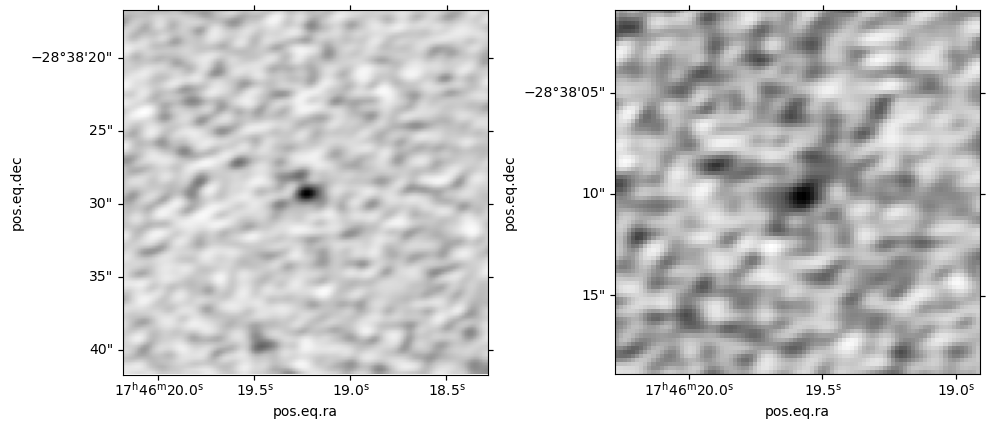

In [140]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection=c1_B3.wcs)
ax1.imshow(c1_B3.data, origin='lower', cmap='Greys')

ax2 = fig.add_subplot(122, projection=c2_B3.wcs)
ax2.imshow(c2_B3.data, origin='lower', cmap='Greys')

plt.tight_layout()

In [141]:
cube_fn = '/orange/adamginsburg/jwst/cloudc/alma/ACES/uid___A001_X15a0_X1a8.s38_0.Sgr_A_star_sci.spw27.cube.I.iter1.image.pbcor.fits'
restfreq = 86.84696*u.GHz # ACES SiO 2-1
c1_outflow = op.OutflowPlot(clump1, l=c1_cutout.l, w=c1_cutout.w, cube_fn=cube_fn, restfreq=restfreq)
c2_outflow = op.OutflowPlot(clump2, l=c2_cutout.l, w=c2_cutout.w, cube_fn=cube_fn, restfreq=restfreq)

mom0_blue = c1_outflow.get_moment0(-60*u.km/u.s, -55*u.km/u.s)
blue_levels = op.percentages(mom0_blue.data, nlevels=3, lower=80, upper=99.9)

mom0_red = c1_outflow.get_moment0(-55*u.km/u.s, -50*u.km/u.s)
red_levels = op.percentages(mom0_red.data, nlevels=3, lower=80, upper=99.9)

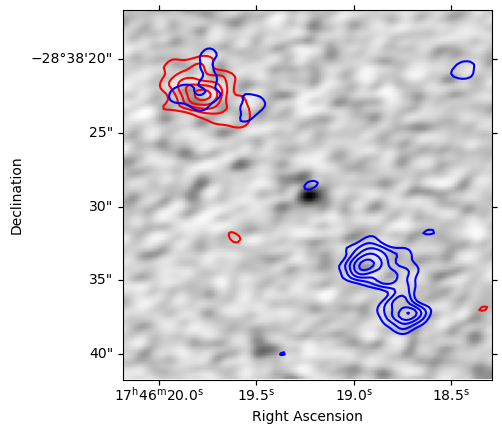

In [142]:
ax = plt.subplot(projection=c1_B3.wcs)
im = ax.imshow(c1_B3.data, cmap='Greys')
c1_outflow.plot_outflows(vcen=-55*u.km/u.s, vmin=-60*u.km/u.s, vmax=-50*u.km/u.s, ax=ax)
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')

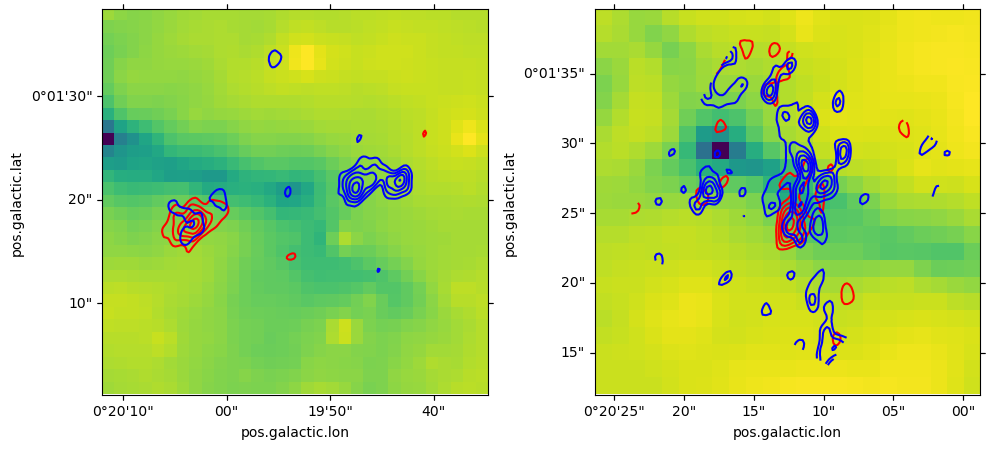

In [143]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121, projection=c1_I4.wcs)
ax1.imshow(c1_I4.data, origin='lower', cmap='viridis', norm=simple_norm(c1_I4.data, stretch='log', max_percent=99.9))
#ax1.scatter(clump1.galactic.l, clump1.galactic.b, transform=ax1.get_transform('world'), color='r', s=20, marker='x')
xlim = ax1.get_xlim()
ylim = ax1.get_ylim()
c1_outflow.plot_outflows(vcen=-55*u.km/u.s, vmin=-60*u.km/u.s, vmax=-50*u.km/u.s, ax=ax1)
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)

ax2 = fig.add_subplot(122, projection=c2_I4.wcs)
ax2.imshow(c2_I4.data, origin='lower', cmap='viridis', norm=simple_norm(c2_I4.data, stretch='log', max_percent=99.9))
#ax2.scatter(clump2.galactic.l, clump2.galactic.b, transform=ax2.get_transform('world'), color='r', s=20, marker='x')
xlim = ax2.get_xlim()
ylim = ax2.get_ylim()
c2_outflow.plot_outflows(vcen=-55*u.km/u.s, vmin=-60*u.km/u.s, vmax=-50*u.km/u.s, ax=ax2)
ax2.set_xlim(xlim)
ax2.set_ylim(ylim)

plt.tight_layout()

In [144]:
from reproject.mosaicking import find_optimal_celestial_wcs
from reproject import reproject_interp
from astropy.io import fits

In [188]:
hdu_B3 = fits.PrimaryHDU(data=c1_B3.data, header=c1_B3.wcs.to_header())
hdu_I4 = fits.PrimaryHDU(data=c1_I4.data, header=c1_I4.wcs.to_header())
hdu_red_m0 = fits.PrimaryHDU(data=mom0_red.data, header=mom0_red.wcs.to_header())
hdu_blue_m0 = fits.PrimaryHDU(data=mom0_blue.data, header=mom0_blue.wcs.to_header())

ww, shape = find_optimal_celestial_wcs([hdu_I4, hdu_red_m0, hdu_blue_m0])

In [266]:
hdu_B3_reproj, _ = reproject_interp(hdu_B3, ww, shape_out=shape)
hdu_I4_reproj, _ = reproject_interp(hdu_I4, ww, shape_out=shape)
hdu_red_m0_reproj, _ = reproject_interp(hdu_red_m0, ww, shape_out=shape)
hdu_blue_m0_reproj, _ = reproject_interp(hdu_blue_m0, ww, shape_out=shape)

In [293]:
fixed = hdu_I4_reproj.copy()
fixed[fixed <= 0] = np.nan
#fixed[np.isnan(hdu_red_m0_reproj)] = np.nan

rgb = np.array(
    [
        hdu_red_m0_reproj,
        hdu_B3_reproj, #np.zeros(shape), #hdu_I4_reproj.data,
        hdu_blue_m0_reproj
    ]
).swapaxes(0,2).swapaxes(0,1)

base = simple_norm(fixed, stretch='linear', max_percent=99.9)(fixed)

rgb_scaled = np.array(
    [
        simple_norm(rgb[:,:,0], stretch='linear', vmin=0)(rgb[:,:,0]),
        simple_norm(rgb[:,:,1], stretch='linear', vmin=0)(rgb[:,:,1]),
        simple_norm(rgb[:,:,2], stretch='linear', vmin=0)(rgb[:,:,2])
    ]
).swapaxes(0,2).swapaxes(0,1)

rgb_scaled[:,:,0] = np.nan_to_num(rgb_scaled[:,:,0], 0) + base
rgb_scaled[:,:,1] = np.nan_to_num(rgb_scaled[:,:,1], 0) + base
rgb_scaled[:,:,2] = np.nan_to_num(rgb_scaled[:,:,2], 0) + base

rgb_scaled[rgb_scaled>1] = 1
rgb_scaled[rgb_scaled>255] = 255

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


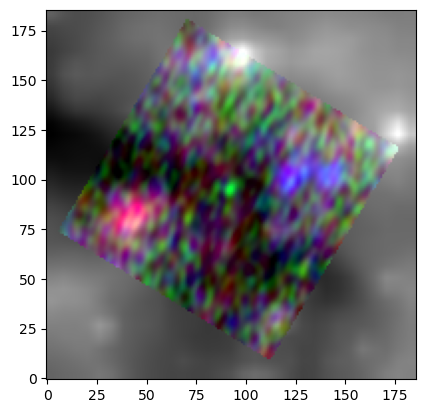

In [294]:
plt.imshow(rgb_scaled, origin='lower')

In [311]:
cutout_405 = c1_cutout.get_cutout_405()
hdu_405 = fits.PrimaryHDU(data=cutout_405.data, header=cutout_405.wcs.to_header())

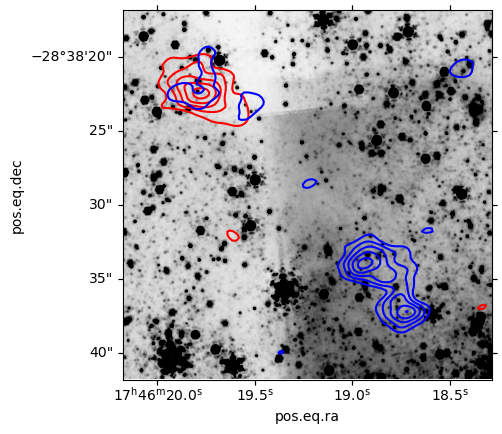

In [310]:
ax = plt.subplot(projection=cutout_405.wcs)
im = ax.imshow(cutout_405.data, cmap='Greys', vmin=0, vmax=50)
c1_outflow.plot_outflows(vcen=-55*u.km/u.s, vmin=-60*u.km/u.s, vmax=-50*u.km/u.s, ax=ax)

In [312]:
ww, shape = find_optimal_celestial_wcs([hdu_405, hdu_red_m0, hdu_blue_m0])
hdu_red_m0_reproj, _ = reproject_interp(hdu_red_m0, ww, shape_out=shape)
hdu_blue_m0_reproj, _ = reproject_interp(hdu_blue_m0, ww, shape_out=shape)
hdu_405_reproj, _ = reproject_interp(hdu_405, ww, shape_out=shape)

In [321]:
fixed = hdu_405_reproj.copy()
fixed[fixed <= 0] = np.nan
#fixed[np.isnan(hdu_red_m0_reproj)] = np.nan

rgb = np.array(
    [
        hdu_red_m0_reproj,
        np.zeros_like(hdu_405_reproj), #np.zeros(shape), #hdu_I4_reproj.data,
        hdu_blue_m0_reproj
    ]
).swapaxes(0,2).swapaxes(0,1)

base = simple_norm(fixed, stretch='linear', vmin=0, vmax=100)(fixed)

rgb_scaled = np.array(
    [
        simple_norm(rgb[:,:,0], stretch='linear', vmin=0)(rgb[:,:,0]),
        simple_norm(rgb[:,:,1], stretch='linear', vmin=0, vmax=50)(rgb[:,:,1]),
        simple_norm(rgb[:,:,2], stretch='linear', vmin=0)(rgb[:,:,2])
    ]
).swapaxes(0,2).swapaxes(0,1)

rgb_scaled[:,:,0] = np.nan_to_num(rgb_scaled[:,:,0], 0) + base
rgb_scaled[:,:,1] = np.nan_to_num(rgb_scaled[:,:,1], 0) + base
rgb_scaled[:,:,2] = np.nan_to_num(rgb_scaled[:,:,2], 0) + base

rgb_scaled[rgb_scaled>1] = 1
rgb_scaled[rgb_scaled>255] = 255

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/orange/adamginsburg/miniconda3/envs/python310/lib/python3.10/site-packages/matplotlib/cm.py:496: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


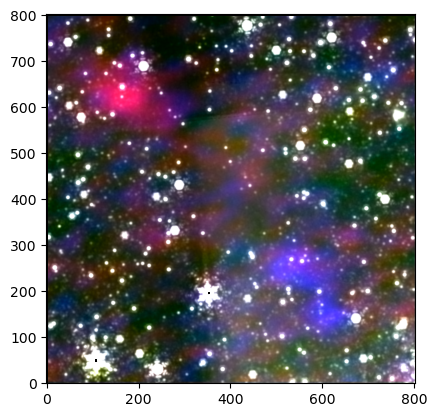

In [322]:
plt.imshow(rgb_scaled, origin='lower')